In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [159]:
url='https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/master/train.csv'

In [160]:
df=pd.read_csv(url)

In [161]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [163]:
# find the null values present

In [164]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [165]:
df['LoanAmount'].max()

700.0

<AxesSubplot:>

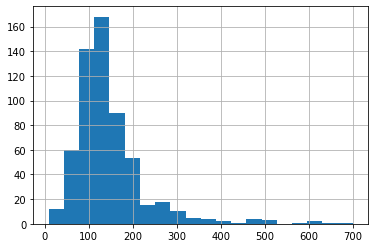

In [166]:
df['LoanAmount'].hist(bins=20)
# x-axis is the loan amount

In [167]:
# we can take log value of Loan Amount also to plot this here we will convert this log and then we will plot this.Lets see

<AxesSubplot:>

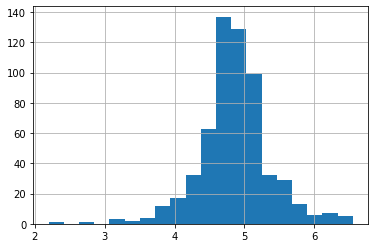

In [168]:
df['LoanAmount_log']=np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [169]:
df['Total_income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     592 non-null    float64
 14  Total_income       614 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 72.1+ KB


<AxesSubplot:>

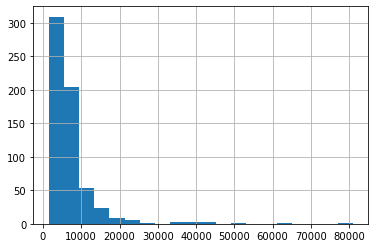

In [171]:
df['Total_income'].hist(bins=20)

In [172]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [173]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [174]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
LoanAmount_log       22
Total_income          0
dtype: int64

In [175]:
df.shape

(614, 15)

In [185]:
df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())

In [188]:
df.LoanAmount_log=df.LoanAmount_log.fillna(df.LoanAmount_log.mean())

In [189]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_income         0
dtype: int64

In [190]:
x=df.iloc[:,np.r_[1:5,9:11,13:15]].values

In [191]:
x.shape

(614, 8)

In [192]:
y=df.iloc[:,12].values

In [193]:
y.shape

(614,)

In [194]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [195]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [196]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()

In [197]:
X_train

array([['Male', 'Yes', '0', ..., 1.0, 4.875197323201151, 5858.0],
       ['Male', 'No', '1', ..., 1.0, 5.278114659230517, 11250.0],
       ['Male', 'Yes', '0', ..., 0.0, 5.003946305945459, 5681.0],
       ...,
       ['Male', 'Yes', '3+', ..., 1.0, 5.298317366548036, 8334.0],
       ['Male', 'Yes', '0', ..., 1.0, 5.075173815233827, 6033.0],
       ['Female', 'Yes', '0', ..., 1.0, 5.204006687076795, 6486.0]],
      dtype=object)

In [198]:
for i in range(0, 5):
    X_train[:,i]=Label.fit_transform(X_train[:,i])
    X_train[:,7]=Label.fit_transform(X_train[:,7])

In [199]:
label=LabelEncoder()

In [200]:
y_train=label.fit_transform(y_train)

In [201]:
for i in range(0, 5):
    X_test[:,i]=Label.fit_transform(X_test[:,i])
    X_test[:,7]=Label.fit_transform(X_test[:,7])

In [202]:
y_test=label.fit_transform(y_test)

In [203]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [204]:
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [205]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [206]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [208]:
from sklearn.metrics import accuracy_score

In [210]:
y_prediction=RFC.predict(X_test)
print('Accuracy',accuracy_score(y_prediction,y_test))

Accuracy 0.7723577235772358


In [212]:
from sklearn.naive_bayes import GaussianNB

In [213]:
GNB=GaussianNB()

In [214]:
GNB.fit(X_train,y_train)

GaussianNB()

In [215]:
y_prediction_GNB=GNB.predict(X_test)
print('Accuracy',accuracy_score(y_prediction_GNB,y_test))

Accuracy 0.8292682926829268


In [216]:
from sklearn.tree import DecisionTreeClassifier
DCT=DecisionTreeClassifier()

In [217]:
DCT.fit(X_train,y_train)

DecisionTreeClassifier()

In [218]:
y_prediction_DCT=DCT.predict(X_test)
print('Accuracy',accuracy_score(y_prediction_DCT,y_test))

Accuracy 0.7398373983739838


In [219]:
from sklearn.neighbors import KNeighborsClassifier

In [220]:
KN=KNeighborsClassifier()

In [221]:
KN.fit(X_train,y_train)

KNeighborsClassifier()

In [222]:
y_prediction_KN=KN.predict(X_test)
print('Accuracy',accuracy_score(y_prediction_KN,y_test))

Accuracy 0.7967479674796748
